In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


In [35]:
(X_train,y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

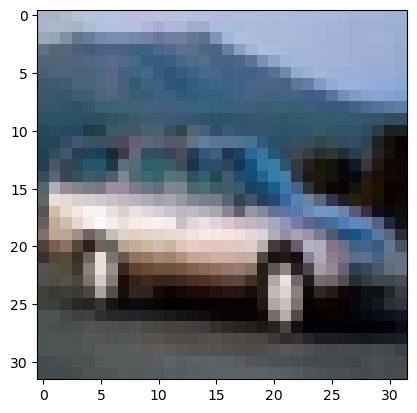

In [9]:
plt.imshow(X_train[4])

In [10]:
X_train = X_train/255
X_test = X_test/255
X_train.shape

(50000, 32, 32, 3)

In [36]:
y_train =tf. keras.utils.to_categorical(y_train, num_classes = 10, dtype = 'float32')
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10, dtype = 'float32')
y_test.shape

(10000, 10)

In [14]:
cnn = models.Sequential([
    
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 80, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(100, activation = 'relu'),
    layers.Dense(50, activation = 'relu'),
    layers.Dense(10, activation = 'softmax'),
])
cnn.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
cnn.fit(X_train, y_train, epochs = 15, validation_data = (X_test,y_test))

Epoch 1/15
1563/1563 [==============================] - 132s 83ms/step - loss: 1.4866 - accuracy: 0.4572 - val_loss: 1.2038 - val_accuracy: 0.5716
Epoch 2/15
1563/1563 [==============================] - 123s 79ms/step - loss: 1.1078 - accuracy: 0.6065 - val_loss: 1.0516 - val_accuracy: 0.6360
Epoch 3/15
1563/1563 [==============================] - 117s 75ms/step - loss: 0.9607 - accuracy: 0.6635 - val_loss: 1.0013 - val_accuracy: 0.6446
Epoch 4/15
1563/1563 [==============================] - 128s 82ms/step - loss: 0.8664 - accuracy: 0.6968 - val_loss: 0.9205 - val_accuracy: 0.6810
Epoch 5/15
1563/1563 [==============================] - 129s 82ms/step - loss: 0.7894 - accuracy: 0.7248 - val_loss: 0.8795 - val_accuracy: 0.6912
Epoch 6/15
1563/1563 [==============================] - 117s 75ms/step - loss: 0.7304 - accuracy: 0.7454 - val_loss: 0.9025 - val_accuracy: 0.6925
Epoch 7/15
1563/1563 [==============================] - 104s 67ms/step - loss: 0.6753 - accuracy: 0.7628 - val_loss: 0

In [37]:
y_predicted = cnn.predict(X_test)
y_label = [np.argmax(i) for i in y_predicted]
y_test = [np.argmax(i) for i in y_test]

313/313 [==============================] - 4s 12ms/step


<AxesSubplot:>

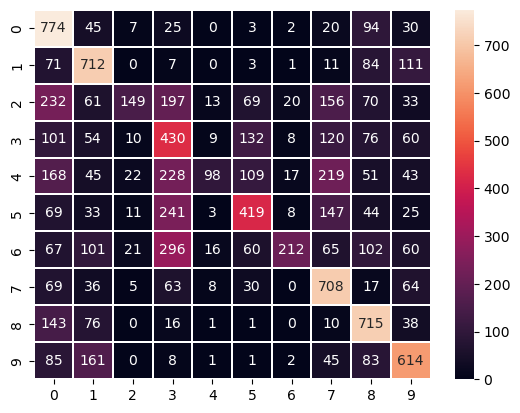

In [38]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_label)
sns.heatmap(cm,annot = True, linewidths=0.2,fmt=".0f")

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)